<a href="https://colab.research.google.com/github/flistz/STAT-5310-Final-Report/blob/main/gibbs_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

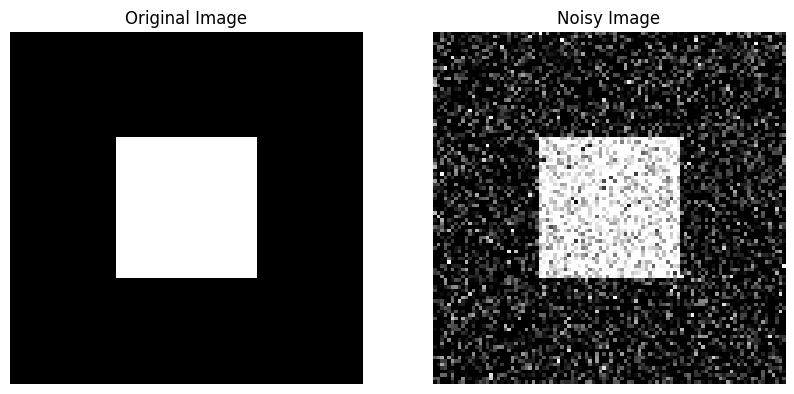

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple image (a white square on a black background)
image_size = 100
image = np.zeros((image_size, image_size))
image[30:70, 30:70] = 1  # white square

# Add Gaussian noise to the image
noisy_image = image + np.random.normal(0, 0.3, (image_size, image_size))
noisy_image = np.clip(noisy_image, 0, 1)  # clip to keep pixel values between 0 and 1

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

plt.show()

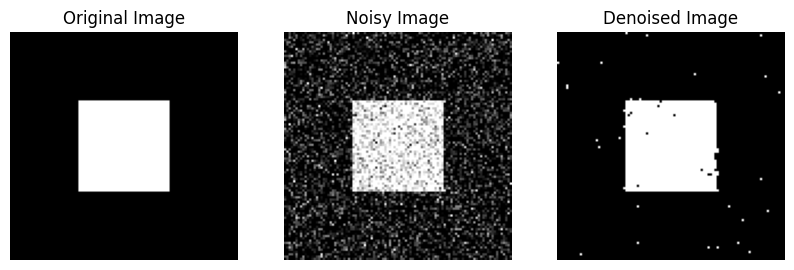

In [2]:
def gibbs_sampling(noisy_image, iterations=20, beta=1.2, eta=2.0):
    """
    Perform Gibbs sampling for image denoising.

    :param noisy_image: Noisy image (numpy array)
    :param iterations: Number of iterations to run the Gibbs sampler
    :param beta: Parameter controlling the effect of neighboring pixels
    :param eta: Parameter controlling the effect of the noisy image
    :return: Denoised image
    """
    # Initialize the denoised image as the noisy image
    denoised_image = np.copy(noisy_image)

    # Gibbs sampling iterations
    for _ in range(iterations):
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                # Calculate the sum of neighboring pixel values
                neighbor_sum = np.sum([
                    denoised_image[i-1 if i-1 >= 0 else 0, j],    # left
                    denoised_image[i+1 if i+1 < noisy_image.shape[0] else i, j],  # right
                    denoised_image[i, j-1 if j-1 >= 0 else 0],    # up
                    denoised_image[i, j+1 if j+1 < noisy_image.shape[1] else j]   # down
                ])

                # Compute probabilities for pixel being 0 or 1
                prob_0 = np.exp(-beta * neighbor_sum - eta * abs(noisy_image[i, j] - 0))
                prob_1 = np.exp(-beta * (4 - neighbor_sum) - eta * abs(noisy_image[i, j] - 1))

                # Normalize probabilities
                prob_0, prob_1 = prob_0 / (prob_0 + prob_1), prob_1 / (prob_0 + prob_1)

                # Update pixel value based on probabilities
                denoised_image[i, j] = 1 if np.random.rand() < prob_1 else 0

    return denoised_image

# Apply Gibbs sampling for image denoising
denoised_image = gibbs_sampling(noisy_image)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title('Denoised Image')
ax[2].axis('off')

# Display the denoised image
# plt.imshow(denoised_image, cmap='gray')
# plt.title('Denoised Image')
# plt.axis('off')
plt.show()

In [4]:
def calculate_mse(original, denoised):
    return np.mean((original - denoised) ** 2)

def calculate_psnr(original, denoised):
    mse = calculate_mse(original, denoised)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

mse = calculate_mse(image, denoised_image)
psnr = calculate_psnr(image, denoised_image)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr} dB")

Mean Squared Error (MSE): 0.0049
Peak Signal-to-Noise Ratio (PSNR): 23.09803919971486 dB
